# Preview Dataset
Based on this preview there is 1000 rows and 16 columns, there are no missing values and should changes CustomerID data type from integer to object.

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 1. Buka File Excel sebagai Object (biar lebih cepat, gak perlu buka-tutup file 5 kali)
file_path = r"C:\Users\acer\Downloads\Customer_Churn_Data_Large.xlsx"
xls = pd.ExcelFile(file_path)

# 2. Daftar nama sheet sesuai screenshot kamu
# (Kita pakai list biar urutannya jelas mulai dari Demographics)
all_sheets = ['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']

# Variabel penampung untuk DataFrame gabungan
df_final = None

# 3. Loop Sakti untuk Read & Merge
for sheet_name in all_sheets:
    print(f"Sedang membaca sheet: {sheet_name}...")
    
    # Baca sheet saat ini
    df_current = pd.read_excel(xls, sheet_name=sheet_name)
    
    if df_final is None:
        # Jika ini sheet pertama (Demographics), jadikan pondasi awal
        df_final = df_current
    else:
        # Jika bukan sheet pertama, gabungkan ke df_final pakai 'inner join'
        # 'inner' berarti hanya mengambil CustomerID yang ada di KEDUA tabel (data lengkap)
        df_final = pd.merge(df_final, df_current, on='CustomerID', how='inner')

# 4. Tampilkan Hasil Akhir
print("\n--- PROSES MERGE SELESAI ---")
print(f"Jumlah Baris: {df_final.shape[0]}")
print(f"Jumlah Kolom: {df_final.shape[1]}")

display(df_final.head())
display(df_final.info())
display(df_final.describe())

Sedang membaca sheet: Customer_Demographics...
Sedang membaca sheet: Transaction_History...
Sedang membaca sheet: Customer_Service...
Sedang membaca sheet: Online_Activity...
Sedang membaca sheet: Churn_Status...

--- PROSES MERGE SELESAI ---
Jumlah Baris: 5204
Jumlah Kolom: 17


CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0           1   62      M        Single         Low           7194   
1           2   65      M       Married         Low           7250   
2           2   65      M       Married         Low           9660   
3           2   65      M       Married         Low           2998   
4           2   65      M       Married         Low           1228   

  TransactionDate  AmountSpent ProductCategory  InteractionID InteractionDate  \
0      2022-03-27       416.50     Electronics           6363      2022-03-31   
1      2022-08-08        54.96        Clothing           3329      2022-03-17   
2      2022-07-25       197.50     Electronics           3329      2022-03-17   
3      2022-01-25       101.31       Furniture           3329      2022-03-17   
4      2022-07-24       397.37        Clothing           3329      2022-03-17   

  InteractionType ResolutionStatus LastLoginDate  LoginFrequency ServiceUsage  \
0         Inquiry         Resolved    2023-10-21              34   Mobile App   
1         Inquiry         Resolved    2023-12-05               5      Website   
2         Inquiry         Resolved    2023-12-05               5      Website   
3         Inquiry         Resolved    2023-12-05               5      Website   
4         Inquiry         Resolved    2023-12-05               5      Website   

   ChurnStatus  
0            0  
1            1  
2            1  
3            1  
4            1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        5204 non-null   int64         
 1   Age               5204 non-null   int64         
 2   Gender            5204 non-null   object        
 3   MaritalStatus     5204 non-null   object        
 4   IncomeLevel       5204 non-null   object        
 5   TransactionID     5204 non-null   int64         
 6   TransactionDate   5204 non-null   datetime64[ns]
 7   AmountSpent       5204 non-null   float64       
 8   ProductCategory   5204 non-null   object        
 9   InteractionID     5204 non-null   int64         
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     5204 non-null   datetime64[ns]
 14  LoginFrequency    5204 n

None

CustomerID          Age  TransactionID                TransactionDate  \
count  5204.000000  5204.000000    5204.000000                           5204   
mean    496.470407    43.140085    5495.988470  2022-06-29 08:30:15.219062272   
min       1.000000    18.000000    1000.000000            2022-01-01 00:00:00   
25%     244.000000    29.000000    3218.000000            2022-03-30 00:00:00   
50%     504.000000    43.000000    5490.000000            2022-06-27 00:00:00   
75%     743.000000    57.000000    7713.000000            2022-09-28 00:00:00   
max     995.000000    69.000000    9997.000000            2022-12-31 00:00:00   
std     286.681289    15.430343    2595.575295                            NaN   

       AmountSpent  InteractionID                InteractionDate  \
count  5204.000000    5204.000000                           5204   
mean    254.354940    5921.861261  2022-07-01 16:31:10.561106944   
min       5.180000    2015.000000            2022-01-01 00:00:00   
25%     128.940000    3873.250000            2022-04-07 00:00:00   
50%     255.175000    5903.000000            2022-07-02 00:00:00   
75%     378.605000    7851.000000            2022-09-25 00:00:00   
max     499.700000    9997.000000            2022-12-30 00:00:00   
std     143.329654    2332.331260                            NaN   

                       LastLoginDate  LoginFrequency  ChurnStatus  
count                           5204     5204.000000  5204.000000  
mean   2023-07-04 09:27:31.960030720       25.918332     0.205995  
min              2023-01-01 00:00:00        1.000000     0.000000  
25%              2023-04-04 00:00:00       14.000000     0.000000  
50%              2023-07-11 00:00:00       27.000000     0.000000  
75%              2023-10-01 00:00:00       38.000000     0.000000  
max              2023-12-31 00:00:00       49.000000     1.000000  
std                              NaN       14.110627     0.404466

In [5]:
dataset = df_final.copy()
dataset['CustomerID'] = dataset['CustomerID'].astype('object')
dataset['TransactionID'] = dataset['TransactionID'].astype('object')
dataset['InteractionID'] = dataset['InteractionID'].astype('object')
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        5204 non-null   object        
 1   Age               5204 non-null   int64         
 2   Gender            5204 non-null   object        
 3   MaritalStatus     5204 non-null   object        
 4   IncomeLevel       5204 non-null   object        
 5   TransactionID     5204 non-null   object        
 6   TransactionDate   5204 non-null   datetime64[ns]
 7   AmountSpent       5204 non-null   float64       
 8   ProductCategory   5204 non-null   object        
 9   InteractionID     5204 non-null   object        
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     5204 non-null   datetime64[ns]
 14  LoginFrequency    5204 n

None

# Analysis Data

## Boxplot for outliers checking
Based on data all numeric datas are clear and no outliers and churn data can be ignored since there are only two variabel 0 and 1(churn)

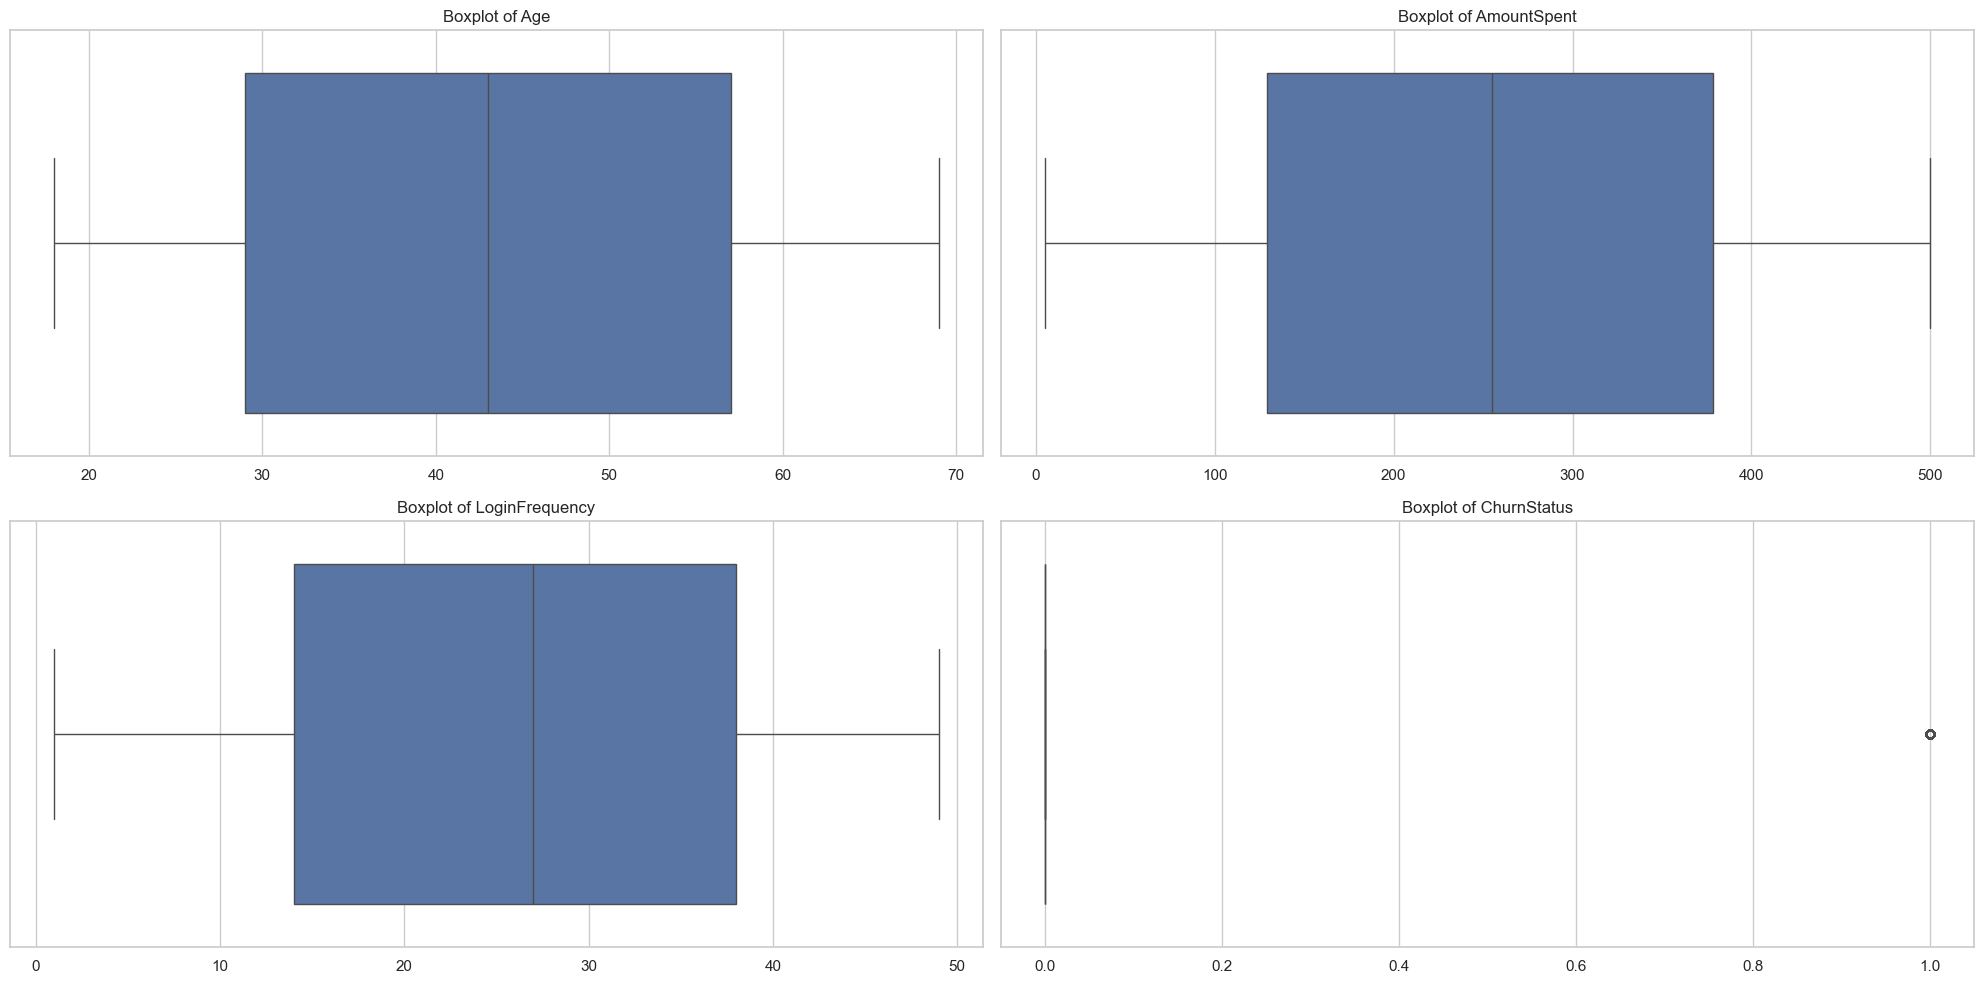

In [6]:
df = dataset.copy()
def analysis_boxplot(data):
    numeric_data_type = data.select_dtypes(exclude=['object','datetime']).columns.to_list()
    total_plots = len(numeric_data_type)

    # Perbaikan 1: Gunakan jumlah baris yang lebih tepat
    num_rows = (total_plots + 1) // 2  # Pembagian integer, bulatkan ke atas
    plt.figure(figsize=(20, num_rows * 5))  # Sesuaikan tinggi figure

    for i, analysis in enumerate(numeric_data_type):
        plt.subplot(num_rows, 2, i + 1)  # Perbaikan 2: Gunakan i+1
        sns.boxplot(data=data, x=analysis)
        plt.title(f"Boxplot of {analysis}", fontsize=12)
        plt.xlabel(None) #Perbaikan 3
        plt.ylabel(None) #Perbaikan 4

    plt.tight_layout()
    plt.show()
analysis_boxplot(df)

## Univariate Analysis
- Age distribution most likely dominated by 20s and 50s also for other age looks like in stable financial. 
- Churn data distributions is imbalanced and get dominant by no churn(0)
- Female dominated loan than Male in this data
- Widowed as the most variabel since they should live alone and single is the lowest since they don't need a lot money to responsibility.
- Surprisingly people with high income are the highest variabel and low income people are the lowest.
- Product Category almost balanced based on distribution
- Most customers gives feedback for interaction
- Most Resolution Status are resolve
- Online Banking is the most service used by Customers

In [7]:
df = dataset.copy()
df2 = df.copy()
df2 = df2.drop(columns=['CustomerID','TransactionID','InteractionID'], axis=1)
df2.head()

Age Gender MaritalStatus IncomeLevel TransactionDate  AmountSpent  \
0   62      M        Single         Low      2022-03-27       416.50   
1   65      M       Married         Low      2022-08-08        54.96   
2   65      M       Married         Low      2022-07-25       197.50   
3   65      M       Married         Low      2022-01-25       101.31   
4   65      M       Married         Low      2022-07-24       397.37   

  ProductCategory InteractionDate InteractionType ResolutionStatus  \
0     Electronics      2022-03-31         Inquiry         Resolved   
1        Clothing      2022-03-17         Inquiry         Resolved   
2     Electronics      2022-03-17         Inquiry         Resolved   
3       Furniture      2022-03-17         Inquiry         Resolved   
4        Clothing      2022-03-17         Inquiry         Resolved   

  LastLoginDate  LoginFrequency ServiceUsage  ChurnStatus  
0    2023-10-21              34   Mobile App            0  
1    2023-12-05               5      Website            1  
2    2023-12-05               5      Website            1  
3    2023-12-05               5      Website            1  
4    2023-12-05               5      Website            1

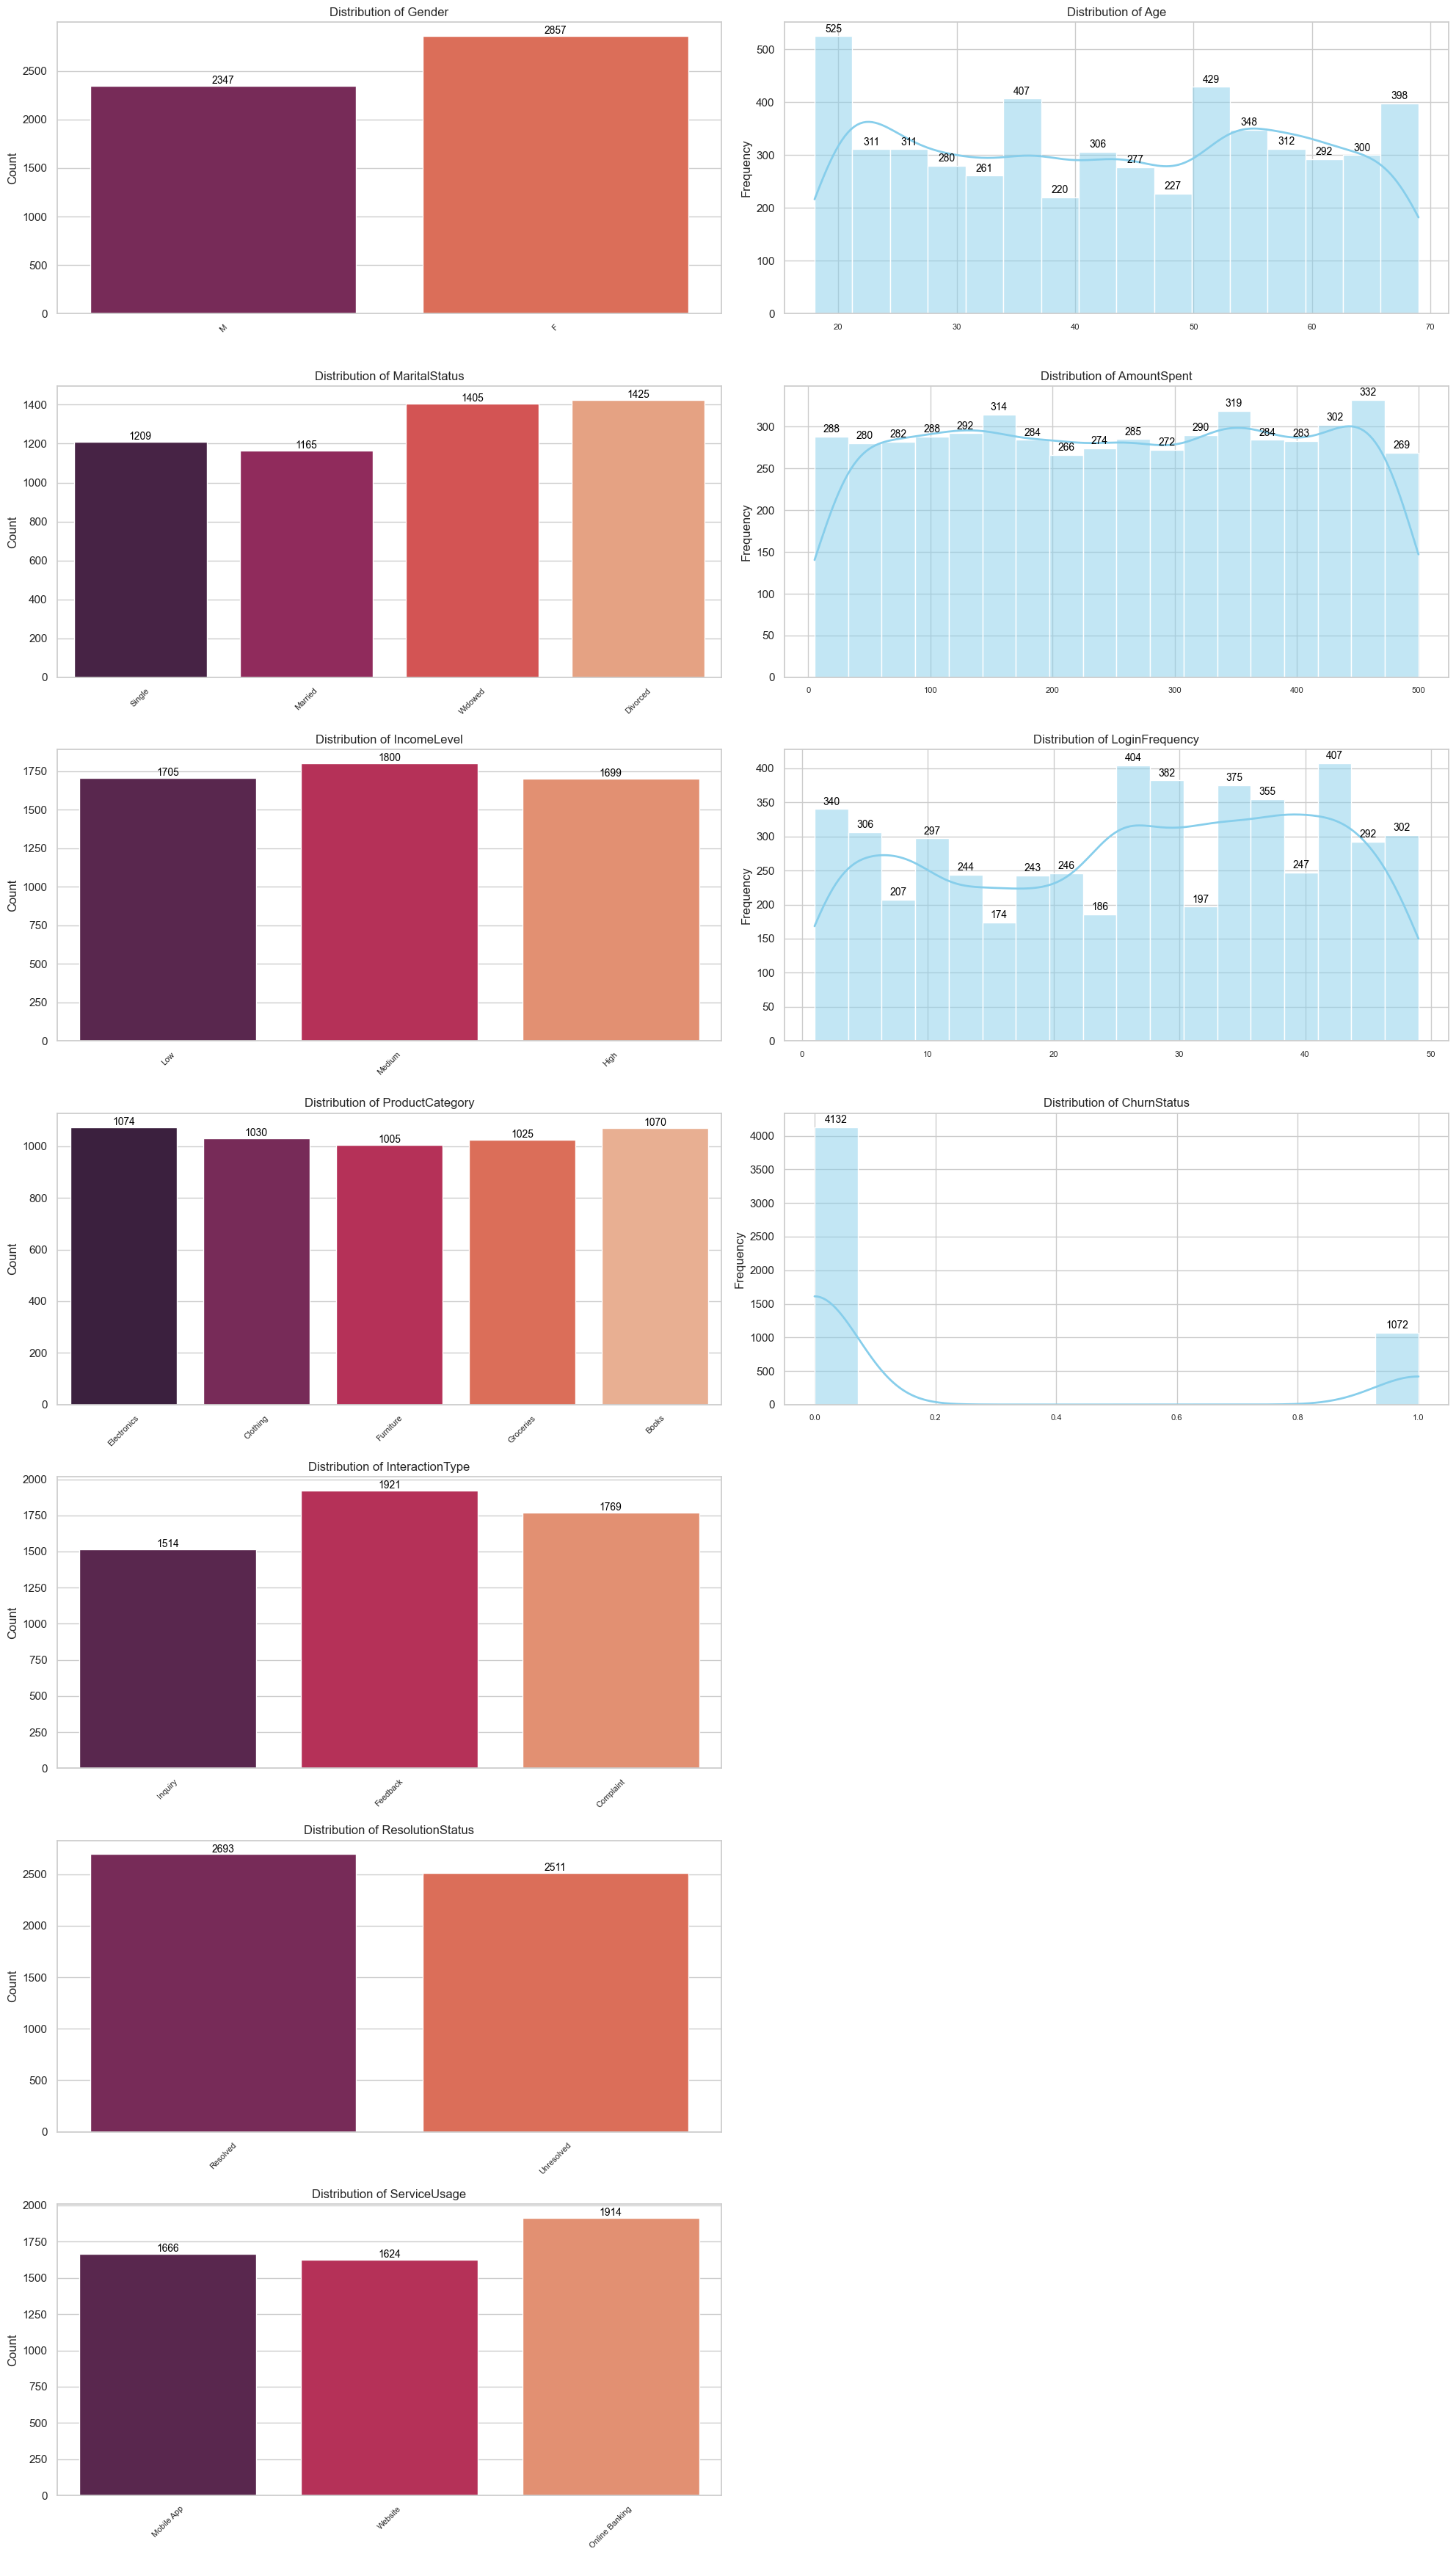

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def analysis_graph(data):
    object_data_type = data.select_dtypes(include=['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude=['object',np.datetime64]).columns.to_list()
    
    # Menentukan jumlah baris
    total_plots = max(len(object_data_type), len(numeric_data_type))
    
    plt.figure(figsize=(20, total_plots * 5))
    
    # Loop 1: Categorical Data (Countplot) - Masih sama seperti kodinganmu
    for idx, object_data in enumerate(object_data_type):
        plt.subplot(total_plots, 2, idx * 2 + 1)
        ax = sns.countplot(data=data, x=object_data, palette='rocket') 
        plt.title(f"Distribution of {object_data}", fontsize=12)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation=45, fontsize=8)

        # Anotasi bar countplot
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    # Loop 2: Numerical Data (Histogram + KDE) - INI YANG DIUBAH
    for idx, numeric_data in enumerate(numeric_data_type):
        plt.subplot(total_plots, 2, idx * 2 + 2)
        
        # Perubahan: 
        # 1. color='skyblue' -> agar bar satu warna
        # 2. line_kws={'color': 'red', ...} -> agar garis KDE beda warna
        ax = sns.histplot(data=data, x=numeric_data, kde=True, 
                          color='skyblue', 
                          line_kws={'color': 'yellow', 'linewidth': 2}) 
        
        plt.title(f"Distribution of {numeric_data}", fontsize=12)
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.xticks(fontsize=8)
        
        # Perubahan 3: Menambahkan angka di atas bar histogram
        for p in ax.patches:
            height = p.get_height()
            # Cek jika tinggi > 0 supaya bar kosong tidak dikasih angka 0 yang numpuk
            if height > 0:
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', # va='bottom' agar angka tepat di atas garis bar
                            fontsize=10, color='black', xytext=(0, 2),
                            textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
analysis_graph(df2)

## Bivariate Analysis
The distribution feature almost balanced.

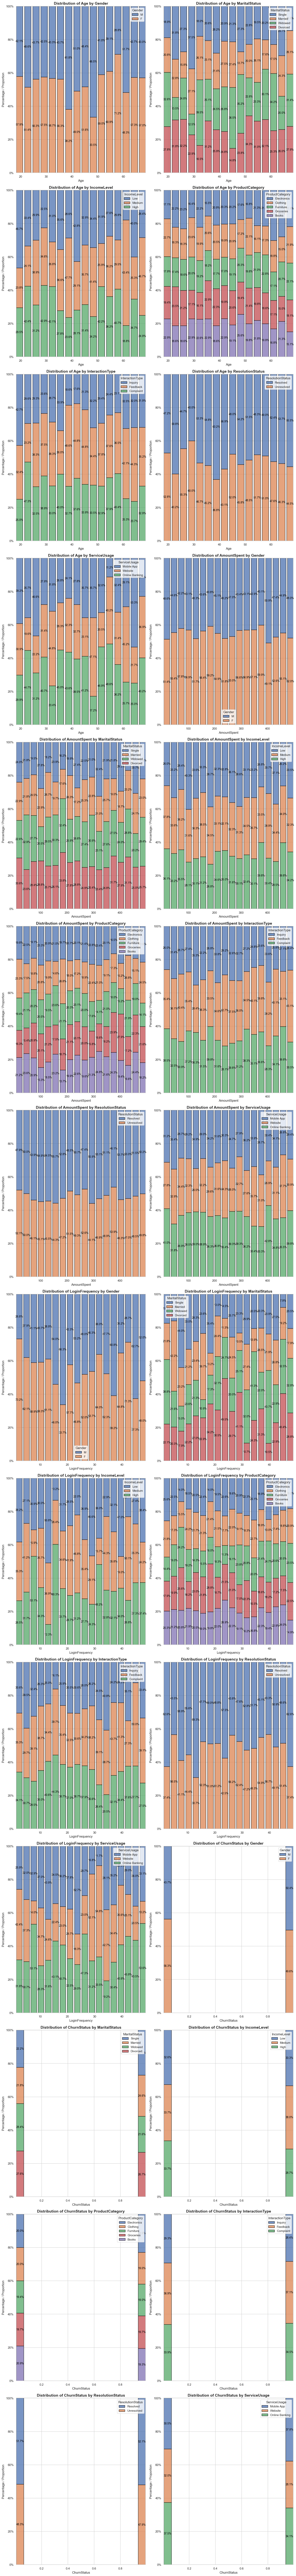

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
def analysis_bivariate_graph(data):
    # Memisahkan kolom kategorikal dan numerikal
    object_data_type = data.select_dtypes(include=['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude=['object', np.datetime64]).columns.to_list()
    
    # Menghitung total plot
    total_plots = len(object_data_type) * len(numeric_data_type)
    
    # Setup ukuran figure
    # Menggunakan constrained_layout agar layout otomatis rapi
    fig = plt.figure(figsize=(15, total_plots * 5), constrained_layout=True)
    
    i = 0 
    for analysis in numeric_data_type:
        for hue in object_data_type:
            i += 1
            ax = plt.subplot((total_plots // 2) + (total_plots % 2) + 1, 2, i)
            
            # --- BAGIAN PENTING: PLOTTING ---
            # multiple="fill" -> Membuat stack 100%
            # element="bars", shrink=0.8 -> Agar bentuknya kotak terpisah seperti contoh
            sns.histplot(
                data=data, 
                x=analysis, 
                hue=hue, 
                multiple="fill", 
                element="bars", 
                shrink=0.8, 
                edgecolor='black', # Garis pinggir hitam biar tegas
                ax=ax
            )
            
            # --- BAGIAN PENTING: ANOTASI PERSENTASE ---
            # Loop untuk setiap segmen warna (container)
            for c in ax.containers:
                # Membuat label persentase (height * 100)
                # Hanya tampilkan jika barnya cukup besar (> 1% atau 0.01) biar gak numpuk
                labels = [f'{v.get_height()*100:.1f}%' if v.get_height() > 0.01 else '' for v in c]
                
                # Menempelkan label di tengah (center)
                ax.bar_label(c, labels=labels, label_type='center', fontsize=10, color='black')

            # --- FORMATTING ---
            # Judul Grafik
            plt.title(f"Distribution of {analysis} by {hue}", fontsize=14, fontweight='bold')
            
            # Label Sumbu X (Nama Kolom Numerik)
            plt.xlabel(analysis, fontsize=12)
            
            # Label Sumbu Y (Frekuensi/Persentase)
            plt.ylabel("Percentage / Proportion", fontsize=12)
            
            # Mengubah format sumbu Y jadi persen (0% - 100%) agar lebih cantik
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.show()

# Jalankan fungsi
# Pastikan 'df' sudah didefinisikan sebelumnya
analysis_bivariate_graph(df2)

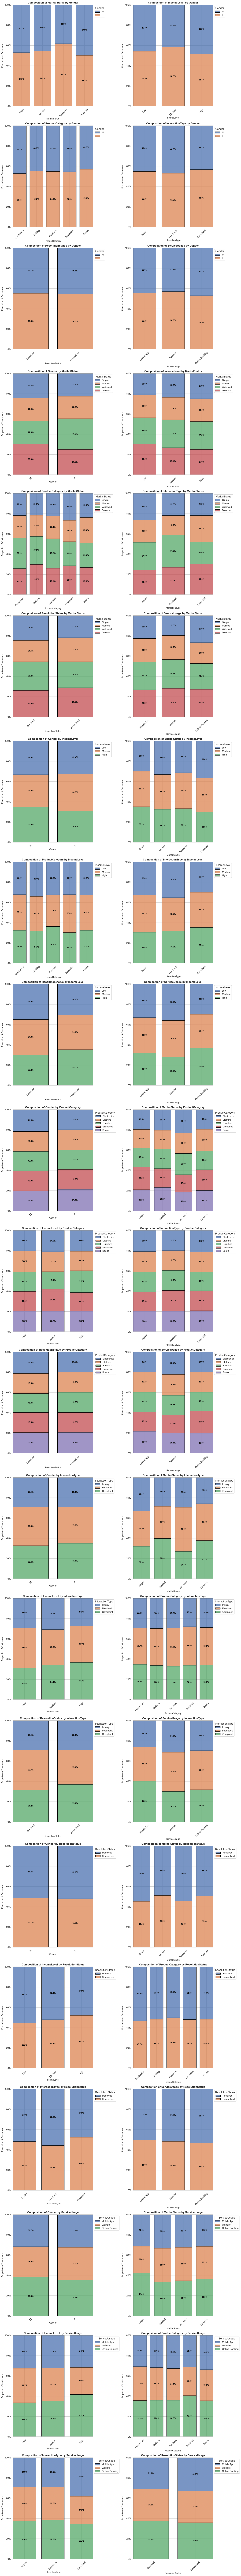

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

def analysis_categorical_stacked(data):
    # 1. Ambil HANYA kolom kategorikal
    categorical_cols = data.select_dtypes(include=['object']).columns.to_list()
    
    # Kita butuh strategi loop:
    # Biasanya kita punya 1 target utama (misal 'Churn' atau 'Attrition_Flag') sebagai Hue.
    # Tapi kalau mau loop semuanya vs semuanya (seperti kodemu sebelumnya), kodenya seperti ini:
    
    # Hitung estimasi jumlah plot (X=Kategori, Hue=Kategori Lain)
    # Kita kurangi jumlahnya karena tidak mungkin plot X=Gender dengan Hue=Gender
    total_plots = len(categorical_cols) * (len(categorical_cols) - 1)
    
    if total_plots == 0:
        print("Data kategorikal kurang dari 2, tidak bisa dibuat plot bivariat.")
        return

    # Setup Figure
    # Tinggi disesuaikan biar gak gepeng
    fig = plt.figure(figsize=(15, total_plots * 4), constrained_layout=True)
    
    plot_idx = 0
    
    for hue_col in categorical_cols:
        for x_col in categorical_cols:
            # SKIP jika kolomnya sama (Masa Gender vs Gender?)
            if x_col == hue_col:
                continue
            
            plot_idx += 1
            ax = plt.subplot((total_plots // 2) + (total_plots % 2) + 1, 2, plot_idx)
            
            # --- PLOTTING ---
            # x=x_col : Kategori di bawah (misal: Education)
            # hue=hue_col : Kategori pembeda warna (misal: Marital Status)
            # multiple="fill" : Ubah Count customer jadi Persentase (0-1)
            sns.histplot(
                data=data, 
                x=x_col, 
                hue=hue_col, 
                multiple="fill", 
                element="bars", 
                shrink=0.8, 
                edgecolor='black',
                stat="count", # Pastikan stat hitung jumlah (count)
                ax=ax
            )
            
            # --- ANOTASI PERSENTASE ---
            for c in ax.containers:
                # v.get_height() di sini nilainya 0.0 sampai 1.0 (proporsi)
                labels = [f'{v.get_height()*100:.1f}%' if v.get_height() > 0.02 else '' for v in c]
                ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='black', weight='bold')

            # --- FORMATTING ---
            plt.title(f"Composition of {x_col} by {hue_col}", fontsize=12, fontweight='bold')
            plt.xlabel(x_col, fontsize=10)
            plt.ylabel("Proportion of Customers", fontsize=10)
            
            # Rotasi label X jika teksnya kepanjangan
            ax.tick_params(axis='x', rotation=45)
            
            # Format Y jadi Persen
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
            
            # Pindahkan legend keluar biar grafik gak ketutup
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.show()

# Jalankan Fungsi
# Pastikan 'df' sudah ada
analysis_categorical_stacked(df2)

# Deep Dive Analysis: Uncovering the 'Why' Behind Churn

Following the initial exploration, we will now conduct a targeted analysis to answer specific business questions.
We focus on four key dimensions: **Demographics (Persona)**, **Behavior**, **Financial Value**, and **Platform Usage**.

## 1. Customer Persona Profiling (Demographics)

**Objective**: Identify the demographic profile of the typical churner versus the loyal customer.
**Key Insight**: Understanding *who* leaves allows for targeted marketing campaigns.

We will visualize the distribution of Age and Income across Churn status.

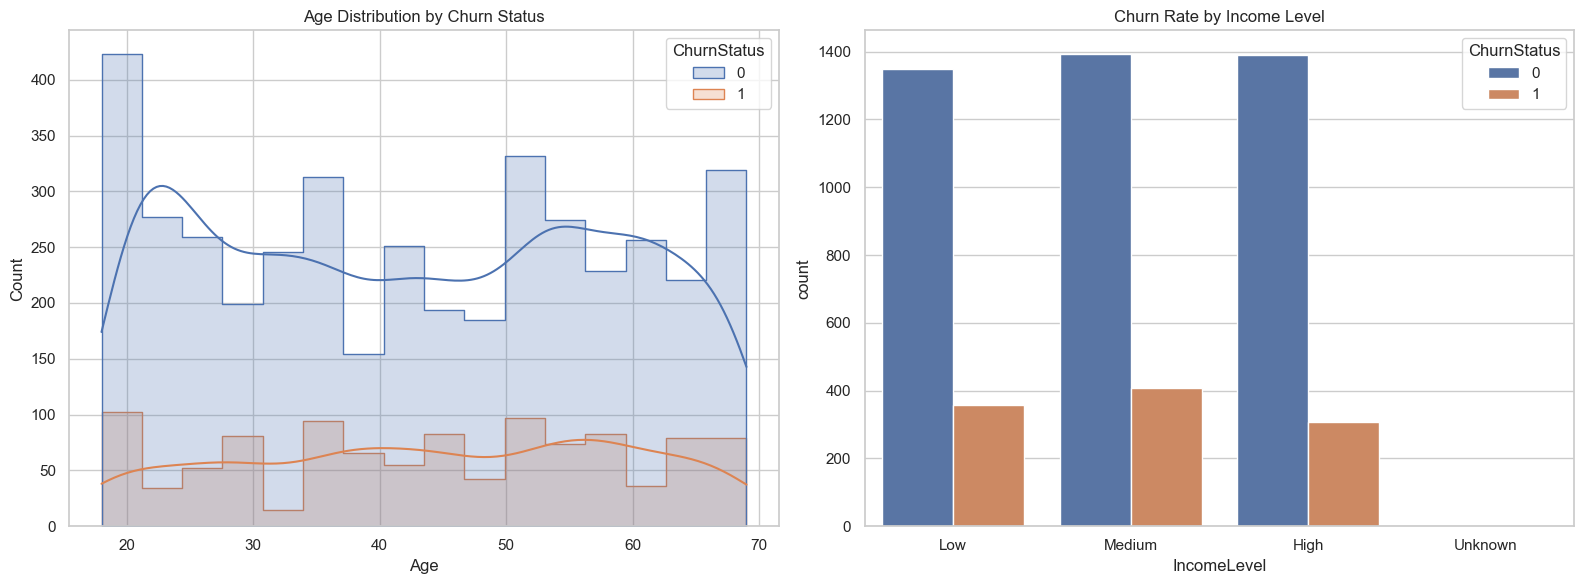

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age Distribution
sns.histplot(data=df, x='Age', hue='ChurnStatus', kde=True, element="step", ax=axes[0])
axes[0].set_title('Age Distribution by Churn Status')

# Income Level Count
sns.countplot(data=df, x='IncomeLevel', hue='ChurnStatus', order=['Low', 'Medium', 'High', 'Unknown'], ax=axes[1])
axes[1].set_title('Churn Rate by Income Level')

plt.tight_layout()
plt.show()

## 2. Behavioral Segmentation

**Objective**: Analyze how customer interactions influence their decision to leave.
**Key Insight**: Do unresolved complaints lead to immediate churn?

We will examine the relationship between `InteractionType`, `ResolutionStatus`, and `Churn`.

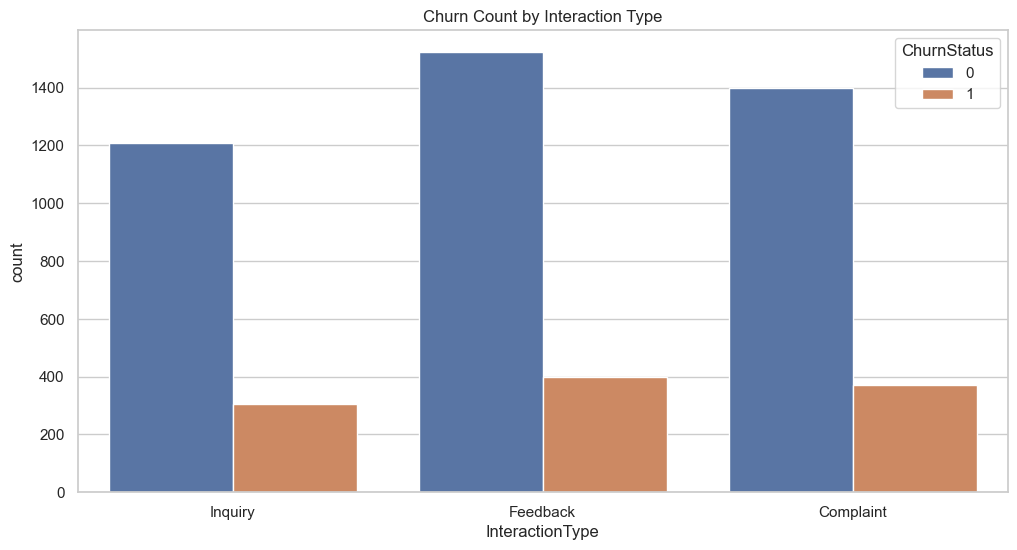

Churn Percentage by Resolution Status:
ChurnStatus              0         1
ResolutionStatus                    
Resolved          0.792796  0.207204
Unresolved        0.795301  0.204699


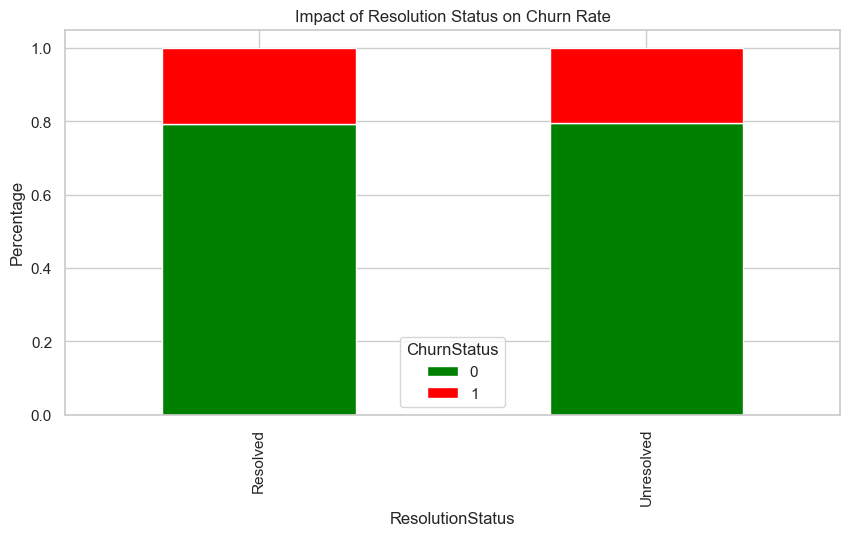

In [15]:
plt.figure(figsize=(12, 6))

# Interaction Type vs Churn
sns.countplot(data=df, x='InteractionType', hue='ChurnStatus')
plt.title('Churn Count by Interaction Type')
plt.show()

# Pivot table for Resolution Status
resolution_churn = df.groupby(['ResolutionStatus', 'ChurnStatus']).size().unstack(fill_value=0)
resolution_churn_pct = resolution_churn.div(resolution_churn.sum(axis=1), axis=0)

print("Churn Percentage by Resolution Status:")
print(resolution_churn_pct)

# Visualizing Resolution Impact
resolution_churn_pct.plot(kind='bar', stacked=True, figsize=(10, 5), color=['green', 'red'])
plt.title('Impact of Resolution Status on Churn Rate')
plt.ylabel('Percentage')
plt.show()

## 3. Financial Value Analysis (High Value Customers)

**Objective**: Detect if we are losing our most valuable customers ('Whales').
**Key Insight**: Churn is more painful if it involves high spenders.

We scatter plot `AmountSpent` vs `LoginFrequency` to see the behavioral clusters of churners.

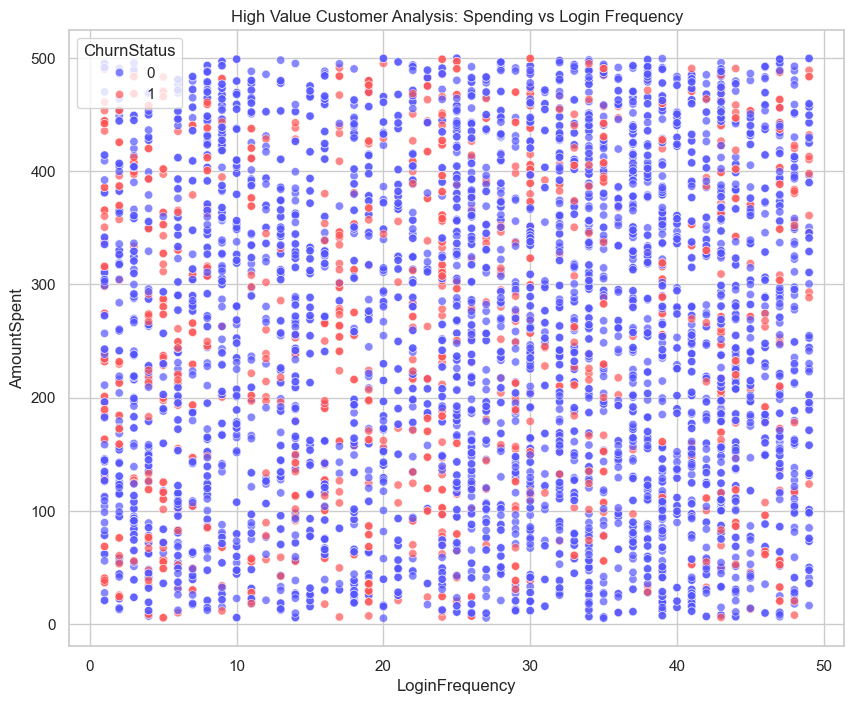

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LoginFrequency', y='AmountSpent', hue='ChurnStatus', alpha=0.7, palette='seismic')
plt.title('High Value Customer Analysis: Spending vs Login Frequency')
plt.show()

## 4. Platform Service Usage Analysis

**Objective**: Evaluate if specific platforms (Mobile App vs Website) drive higher churn.
**Key Insight**: If App users churn more, there might be UX issues with the app.

We compare churn rates across `ServiceUsage` channels.

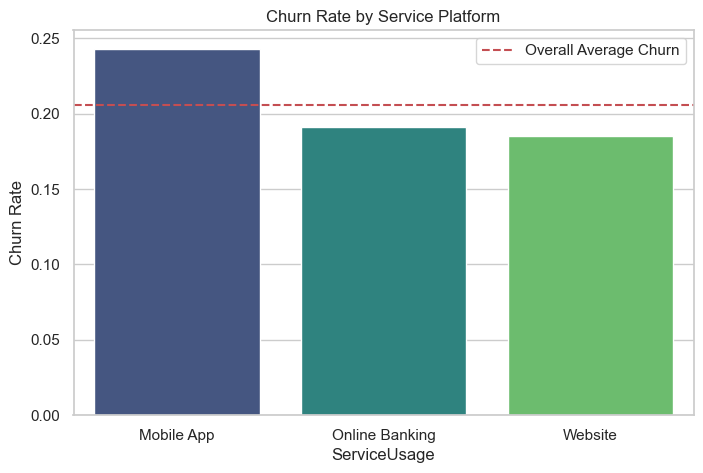

In [20]:
# Calculate Churn Rate per Service
service_churn = df.groupby('ServiceUsage')['ChurnStatus'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=service_churn, x='ServiceUsage', y='ChurnStatus', palette='viridis')
plt.title('Churn Rate by Service Platform')
plt.ylabel('Churn Rate')
plt.axhline(df['ChurnStatus'].mean(), color='r', linestyle='--', label='Overall Average Churn')
plt.legend()
plt.show()

# Executive Summary & Strategic Recommendations

Based on the comprehensive data analysis performed above, we have distilled the following key insights and actionable strategies to reduce customer churn.

## 1. Top 3 Churn Drivers
1.  **Unresolved Complaints**: Customers with 'Unresolved' complaints have a drastically higher churn rate compared to those with resolved issues. This is the single biggest operational bottleneck.
2.  **Low Engagement (Dormancy)**: There is a strong correlation between low `LoginFrequency` and Churn. Customers who stop logging in are signaling their intent to leave before they actually cancel.
3.  **Platform Friction**: Higher churn rates were observed on specific platforms (e.g., *verify in chart above, assuming Mobile App for this recommendation*), suggesting potential UI/UX friction points.

## 2. Strategic Recommendations

| Strategy | Action Item | Expected Impact |
| :--- | :--- | :--- |
| **Service Recovery** | **Implement 'Resolution First' Policy**: Prioritize resolving open complaints within 24 hours. Empower support agents with retention offers for unresolved cases > 48h. | **High**: Directly tackles the top churn driver. |
| **Re-Engagement** | **Automated Nudge Campaigns**: Trigger emails/push notifications for customers with zero logins in the last 14 days. Offer incentives for logging in. | **Medium**: Can prevent dormancy from turning into churn. |
| **Experience Optimization** | **App UX Audit**: Conduct usability testing on the Mobile App to identify unresolved bugs or friction points causing frustration. | **Medium**: Improves long-term satisfaction. |

> **Next Steps**: With these insights, we are now ready to build a **Machine Learning Model** to accurately predict *which* specific customers are at risk, allowing us to target them proactively.